In [1]:
#Optimistic initial values, it is a solution to Explore-Exploit Dilemma, i.e A/B Testing vs Human Emotion, it is
#a bayesian approach to it, the mean and all other things are basically a sample from a distribution. With more
#samples our distribution gets better and gives us more accurate samples.
import numpy as np
import math
import matplotlib.pyplot as plt

In [51]:
class Bandit:
    def __init__(self, m):
        #X = N(mu, tau inv)
        #mu = N(mo, lamba inv)
        #mu = N(0,1)
        #for simplicity sake m0 = 0
        #true mean
        self.m = m
        #our calculated mean
        self.mean = 0
        self.lambda_ = 1
        self.sum_x = 0
        self.tau = 1
    
    def pullArm(self):
        return np.random.randn() + self.m

    def update(self, x):
        self.lambda_ += 1
        self.sum_x += x
        self.mean = (self.mean + self.tau*self.sum_x)/(self.lambda_)
        
    def update01(self, x):
        self.lambda_ += 1
        self.sum_x += x
        self.mean = (self.tau*self.sum_x)/(self.lambda_)
        
    def sample(self):
        #mean m0, precision lambda
        return np.random.randn() / np.sqrt(self.lambda_) + self.mean

In [52]:
def experiment(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # optimistic initial values
        arm = np.argmax([b.sample() for b in bandits])
        x = bandits[arm].pullArm()
        bandits[arm].update(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    for b in bandits:
        print(b.mean)
    return cumulative_average

In [53]:
def experiment01(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]

    data = np.empty(N)

    for i in range(N):
        # optimistic initial values
        arm = np.argmax([b.sample() for b in bandits])
        x = bandits[arm].pullArm()
        bandits[arm].update01(x)

        # for the plot
        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)

    # plot moving average ctr
    plt.plot(cumulative_average)
    plt.plot(np.ones(N)*m1)
    plt.plot(np.ones(N)*m2)
    plt.plot(np.ones(N)*m3)
    plt.xscale('log')
    plt.show()
    for b in bandits:
        print(b.mean)
    return cumulative_average

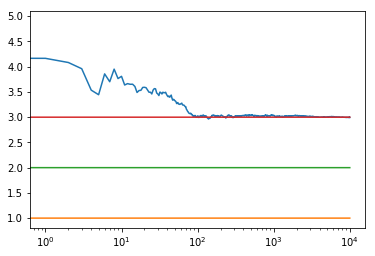

-0.19415313425999936
0.881461683722416
2.99571020301375


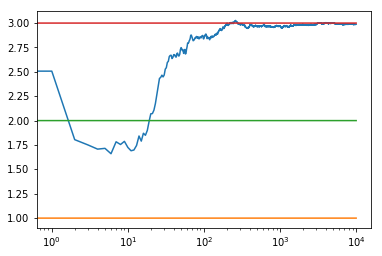

0.6628313345678903
1.7943567359688593
2.9896780758378734


In [55]:
if __name__ == '__main__':
    m1 = 1.0
    m2 = 2.0
    m3 = 3.0
    experiment(m1, m2, m3, 10000)
    experiment01(m1, m2, m3, 10000)